<a href="https://colab.research.google.com/github/rgmartin/ECSE552-HW4/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
train_csv = "weather_train.csv"
test_csv = "weather_test.csv"

train_dataframe = pd.read_csv(train_csv, header=0)
test_dataframe = pd.read_csv(test_csv, header=0)

features = ['p (mbar)','T (degC)', 'rh (%)', 'wv (m/s)']

In [16]:
# Get some basic counts and ratios at first
test_count = test_dataframe.shape[0]
train_count = train_dataframe.shape[0]
print("Number of test samples: ", test_dataframe.shape[0])
print("Number of training samples: ", train_dataframe.shape[0])
print("Ratio of test to training: ", test_dataframe.shape[0]/train_dataframe.shape[0])

Number of test samples:  14019
Number of training samples:  56072
Ratio of test to training:  0.2500178342131545


In [26]:
train_stats = train_dataframe.describe()
test_stats = test_dataframe.describe()

# Remove the outliers from wind speed where the value is less than zero
test_dataframe.loc[test_dataframe['wv (m/s)'] < 0, 'wv (m/s)'] = 0
train_dataframe.loc[train_dataframe['wv (m/s)'] < 0, 'wv (m/s)'] = 0

for feature in features:
    print("**" + feature + "**")
    print('\ttrain \t test \t diff')
    print('mean:\t{:.2f}\t{:.2f}\t{:.2f}'.format(train_stats[feature]['mean'], test_stats[feature]['mean'], train_stats[feature]['mean'] - test_stats[feature]['mean']))
    print('std:\t{:.2f}\t{:.2f}\t{:.2f}'.format(train_stats[feature]['std'], test_stats[feature]['std'], train_stats[feature]['std'] - test_stats[feature]['std']))
    print('min:\t{:.2f}\t{:.2f}\t{:.2f}'.format(train_stats[feature]['min'], test_stats[feature]['min'], train_stats[feature]['min'] - test_stats[feature]['min']))
    print('max:\t{:.2f}\t{:.2f}\t{:.2f}'.format(train_stats[feature]['max'], test_stats[feature]['max'], train_stats[feature]['max'] - test_stats[feature]['max']))
    print()


**p (mbar)**
	train 	 test 	 diff
mean:	988.83	990.73	-1.90
std:	8.35	8.22	0.13
min:	913.60	956.96	-43.36
max:	1013.91	1015.29	-1.38

**T (degC)**
	train 	 test 	 diff
mean:	8.99	11.30	-2.31
std:	8.44	8.09	0.35
min:	-22.76	-13.67	-9.09
max:	35.65	37.28	-1.63

**rh (%)**
	train 	 test 	 diff
mean:	76.21	75.22	0.99
std:	16.50	16.36	0.14
min:	13.88	23.64	-9.76
max:	100.00	99.90	0.10

**wv (m/s)**
	train 	 test 	 diff
mean:	2.15	2.05	0.10
std:	1.54	1.54	-0.00
min:	0.00	0.00	0.00
max:	14.01	12.05	1.96



In [18]:
def get_hour_from_date(date_time_string):
    return int(date_time_string[11:13])

# for i in range(30):
#     print((train_dataframe["Date Time"][i]))
#     print(get_hour_from_date(train_dataframe["Date Time"][i]))
#     print("\n")

train_dataframe["Date Time"] = train_dataframe["Date Time"].apply(get_hour_from_date)

In [19]:
train_dataframe.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,1,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,3,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,4,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,5,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [20]:
train_dataframe.columns[1:]

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


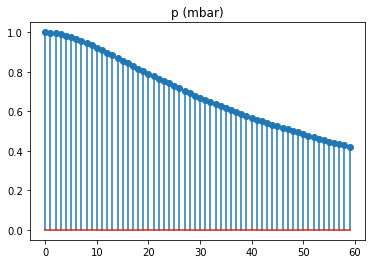

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


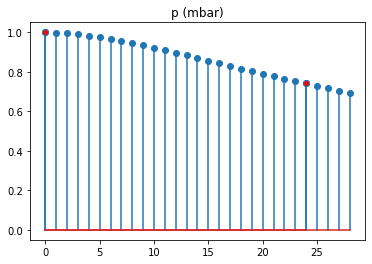

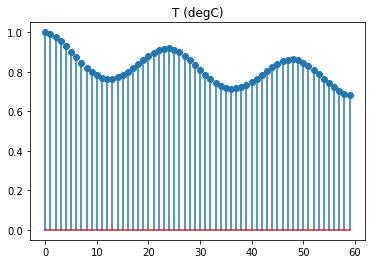

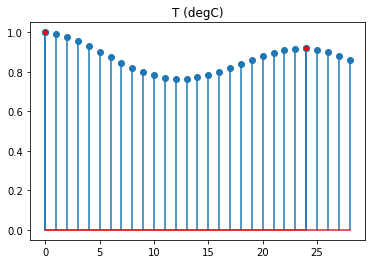

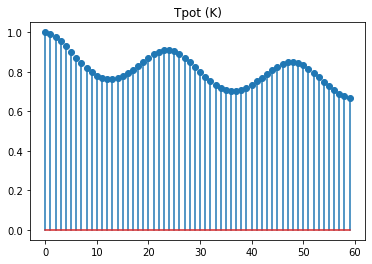

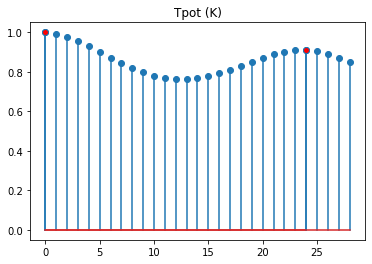

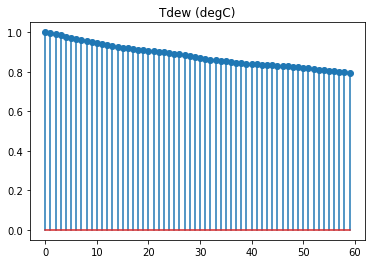

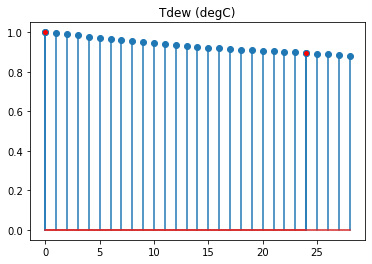

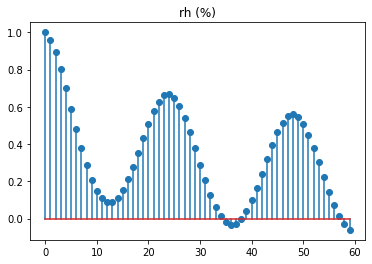

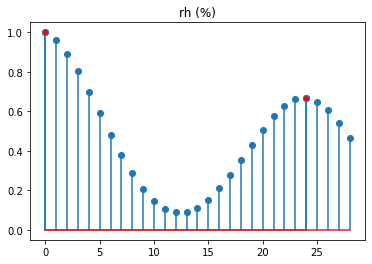

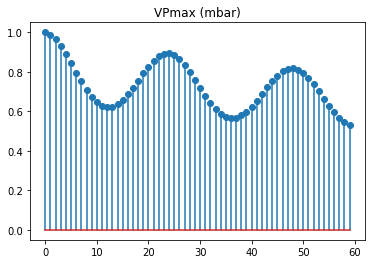

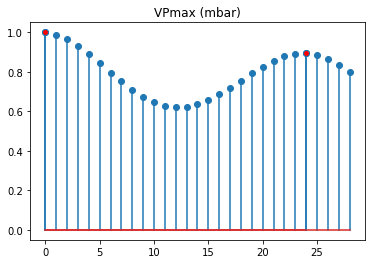

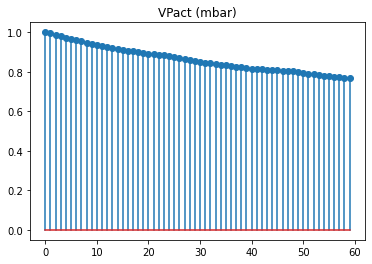

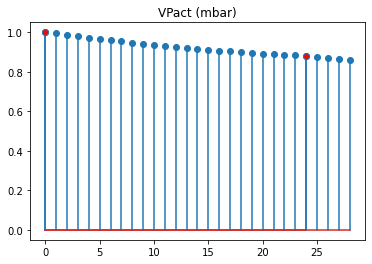

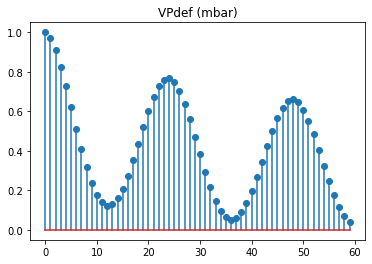

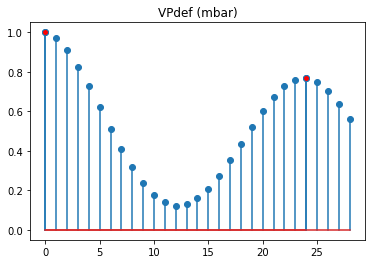

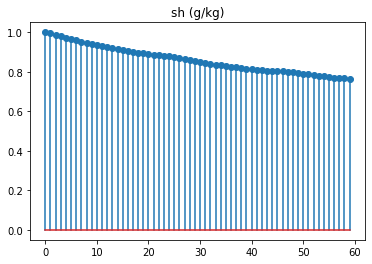

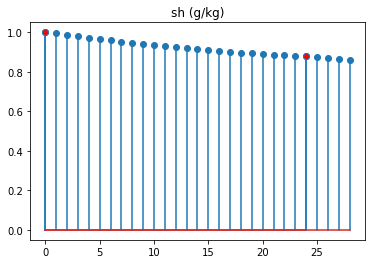

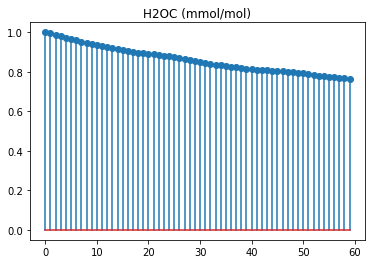

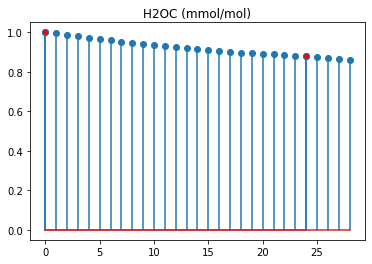

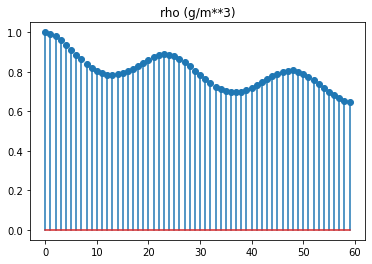

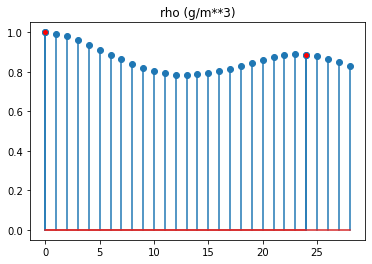

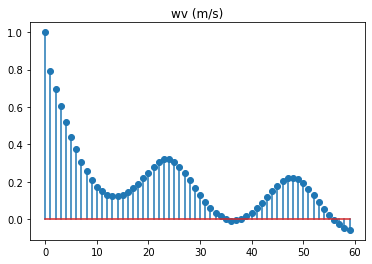

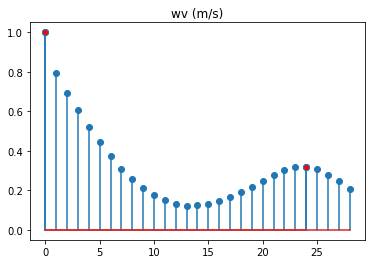

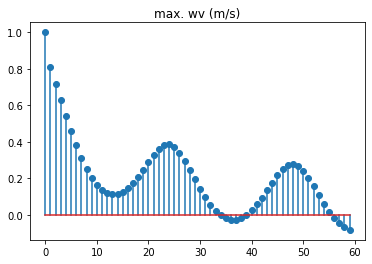

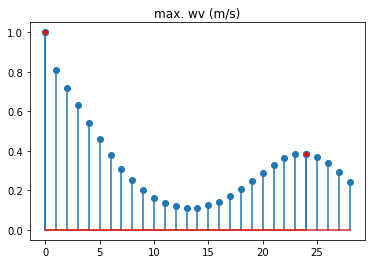

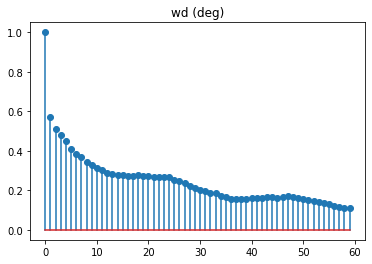

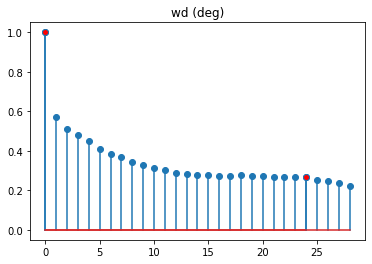

In [21]:
period = 24
lags = list(range(0, 60))

for feature in train_dataframe.columns[1:]: # don't get the first feature as that is just the time stamp
    series_data = train_dataframe[feature]
    autocorr = []
    for lag in lags:
        autocorr.append(series_data.autocorr(lag=lag))

    plt.stem(lags, autocorr)
    plt.title(feature)
    plt.show()

    plt.stem(lags[0:period+5], autocorr[0:period+5])
    markerline, stemlines, baseline = plt.stem([lags[0], lags[period]], [autocorr[0], autocorr[period]])
    markerline.set_markerfacecolor('red')
    plt.title(feature)
    plt.show()


In [22]:
from sklearn.feature_selection import mutual_info_regression

def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value
    
df_pearson = train_dataframe.corr(method='pearson')
df_mi = train_dataframe.corr(method=custom_mi_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [23]:
train_dataframe

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,1,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
1,2,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
2,3,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.20
3,4,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.00
4,5,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56067,14,991.94,17.16,290.99,9.83,62.00,19.60,12.15,7.45,7.66,12.25,1184.73,3.00,4.60,32.83
56068,15,991.52,17.77,291.64,9.29,57.52,20.37,11.72,8.66,7.38,11.82,1181.94,0.88,2.28,99.40
56069,16,990.96,19.40,293.32,9.07,51.17,22.56,11.55,11.02,7.28,11.65,1174.77,0.62,1.36,143.00
56070,17,990.56,19.03,292.98,9.04,52.25,22.05,11.52,10.53,7.27,11.63,1175.79,0.79,1.36,197.10


In [24]:
# df_pearson[features]
df_mi[features]
# df_mi = df_mi[features]
# df_mi
# df_pearson

,p (mbar),T (degC),rh (%),wv (m/s)
Date Time,0.000000,0.057603,0.162941,0.078087
p (mbar),1.000000,0.120060,0.025553,0.035750
T (degC),0.120060,1.000000,0.250455,0.023025
Tpot (K),0.126167,2.646033,0.244428,0.029071
Tdew (degC),0.131090,1.139347,0.055751,0.013085
rh (%),0.025553,0.250455,1.000000,0.068511
VPmax (mbar),0.117192,7.628522,0.247464,0.025593
VPact (mbar),0.132892,1.137036,0.051139,0.012804
VPdef (mbar),0.059277,0.680552,1.075569,0.053249
sh (g/kg),0.132739,1.124664,0.053706,0.012914


In [25]:
# Find the features for each variable we want to predict which have an MI with 
# the variable which is higher than a threshold. Use 1 for now and then raise it
# if the training computations take too long. Or this is a hyperparameter we 
# could tune/experiment with.

threshold = 1.25
for feature in features:
    print("\n**" + feature + "**")
    print(df_mi[df_mi[feature] > threshold])


**p (mbar)**
Empty DataFrame
Columns: [Date Time, p (mbar), T (degC), Tpot (K), Tdew (degC), rh (%), VPmax (mbar), VPact (mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd (deg)]
Index: []

**T (degC)**
              Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  \
Tpot (K)       0.057547  0.126167  2.646033  1.000000     1.038273  0.244428   
VPmax (mbar)   0.057748  0.117192  7.628522  2.641436     1.131732  0.247464   
rho (g/m**3)   0.057243  0.163889  1.452974  1.792943     0.847087  0.197335   

              VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Tpot (K)          2.641436      1.035961      0.661902   1.061013   
VPmax (mbar)      1.000000      1.135633      0.682576   1.123734   
rho (g/m**3)      1.445704      0.845809      0.529554   0.861981   

              H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
Tpot (K)             1.060112      1.792943  0.029071       0.019773  0.0501